<a href="https://www.kaggle.com/code/leomauro/profissionais-de-dados-no-brasil-2021?scriptVersionId=95794395" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<a id='top'></a>
# Profissionais de Dados no Brasil (2021)

Este notebook realiza uma Análise Exploratória de Dados (_Exploratory Data Analysis - EDA_) sobre o dataset [Data Hackers Survey 2021](https://www.kaggle.com/datasets/datahackers/state-of-data-2021). Um conjunto de dados que reúne mais de 2.600 respostas da pesquisa de mercado de _Profissionais de Dados_ feita pelo Data Hackers, no ano de 2021. Neste estudo veremos um conjunto de visualizações sobre os dados demográficos, observações sobre as verticais empresas e salários, tecnologias mais utilizadas no mercado de trabalho e, por fim, como se manter atualizado na área.

**Disclaimer**. Neste notebook será explorado as três bibliotécas de visualização de dados mais famosas, `matplotlib`, `seaborn` e `plotly`. Contudo, o objetivo não é explorar suas possibilidades, mas apenas apresentar algumas visualizações iniciais. 

> **Nota**. Alguns códigos foram ocultados a fim de facilitar a leitura do notebook.   
> Além disso, destaco que cada seção apresenta sua própria conclusão.


**Table of Contents**

- [Dados](#data) - Carregamento e pré-processamento dos dados.
- [Estudo de Demografia](#demography) - Análises sobre os gêneros, localização, nível de ensino, bem como área de formação.
- [Estudo de Empresas](#job) - Análise sobre setores e faixa salarial dos cientistas de dados.
- [Estudo de Tecnologia](#tech) - Análise sobre as tecnologias mais utilizadas no mercado de trabalho.

<a id='data'></a>

---

# Dados

Esta seção reúne um conjunto de código para carregamento e pré-processamento sobre os dados.   
Além disso, uma visão inicial dos dados disponíveis neste dataset.

[Voltar para o Topo](#top)


## Importações das bibliotecas

In [1]:
# pacote de processamento dos dados
import pandas as pd

# pacote de visualização de dados
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
# definindo um layout dos gráficos
mpl.style.use('seaborn-whitegrid')
sns.set_theme(style="whitegrid")

## Carregamento dos Dados

- Listando os arquivos disponíveis.
- Carregando a planilha num `pandas.DataFrame`.

In [3]:
import os

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        path = os.path.join(dirname, filename)
        print(path)

/kaggle/input/state-of-data-2021/State of Data 2021 - Dataset - Pgina1.csv


In [4]:
# leitura do arquivo
df = pd.read_csv(path, low_memory=False)

# imprime as 3 primeiras linhas
df.head(3)

,"('P0', 'id')","('P1_a ', 'Idade')","('P1_a_a ', 'Faixa idade')","('P1_b ', 'Genero')","('P1_e ', 'Estado onde mora')","('P1_e_a ', 'uf onde mora')","('P1_e_b ', 'Regiao onde mora')","('P1_g_b ', 'Regiao de origem')","('P1_g_c ', 'Mudou de Estado?')","('P1_h ', 'Nivel de Ensino')",...,"('P8_d_g ', 'Criando e dando manutenção em ETLs, DAGs e automações de pipelines de dados.')","('P8_d_h ', 'Criando e gerenciando soluções de Feature Store e cultura de MLOps.')","('P8_d_i ', 'Criando e mantendo a infra que meus modelos e soluções rodam (clusters, servidores, API, containers, etc.)')","('P9_a ', 'Quais das iniciativas do Data Hackers que você já acessou/acompanhou?')","('P9_a_a ', 'Blog/Medium do Data Hackers')","('P9_a_b ', 'Podcast do Data Hackers')","('P9_a_d ', 'Newsletter Semanal')","('P9_a_e ', 'Canal do Slack')","('P9_a_f ', 'Canal do Youtube do Data Hackers')","('P9_a_g ', 'Ainda não conhecia o Data Hackers')"
0,qkx4q0ei90wcjxnqkx4q0j3xgf0zn13s,38.0,35-39,Masculino,Ceará (CE),CE,Nordeste,NaN,0,Pós-graduação,...,NaN,NaN,NaN,"Newsletter Semanal, Podcast do Data Hackers",0,1,1,0,0,0
1,zdl2n19yhgpnoaco6kkczdl2nwv9zwrt,39.0,35-39,Masculino,Bahia (BA),BA,Nordeste,Sudeste,1,Pós-graduação,...,NaN,NaN,NaN,"Newsletter Semanal, Blog/Medium do Data Hackers",1,0,1,0,0,0
2,vsamqp2un3q7us84mgvsams5fulsmcoh,30.0,30-34,Masculino,Santa Catarina (SC),SC,Sul,NaN,0,Pós-graduação,...,NaN,NaN,NaN,"Blog/Medium do Data Hackers, Podcast do Data H...",1,1,0,0,0,0


## Pré-Processamento dos Dados

- Selecionando as colunas de interesse.

### Seleção de colunas

Nós vamos excluir as colunas que não serão necessárias para a nossa análise de dados.   
Neste notebook, queremos fazer um estudo de Demografia, de Empresas, de Tecnologia e plataformas de ensino. Todo o resto será excluído.

In [5]:
df.columns

Index(['('P0', 'id')', '('P1_a ', 'Idade')', '('P1_a_a ', 'Faixa idade')',
       '('P1_b ', 'Genero')', '('P1_e ', 'Estado onde mora')',
       '('P1_e_a ', 'uf onde mora')', '('P1_e_b ', 'Regiao onde mora')',
       '('P1_g_b ', 'Regiao de origem')', '('P1_g_c ', 'Mudou de Estado?')',
       '('P1_h ', 'Nivel de Ensino')',
       ...
       '('P8_d_g ', 'Criando e dando manutenção em ETLs, DAGs e automações de pipelines de dados.')',
       '('P8_d_h ', 'Criando e gerenciando soluções de Feature Store e cultura de MLOps.')',
       '('P8_d_i ', 'Criando e mantendo a infra que meus modelos e soluções rodam (clusters, servidores, API, containers, etc.)')',
       '('P9_a ', 'Quais das iniciativas do Data Hackers que você já acessou/acompanhou?')',
       '('P9_a_a ', 'Blog/Medium do Data Hackers')',
       '('P9_a_b ', 'Podcast do Data Hackers')',
       '('P9_a_d ', 'Newsletter Semanal')', '('P9_a_e ', 'Canal do Slack')',
       '('P9_a_f ', 'Canal do Youtube do Data Hackers')',
     

In [6]:
f"Quantidade de columnas: {len(df.columns):d}"

'Quantidade de columnas: 356'

In [7]:
columns = [
    # Demografia
    "('P1_a_a ', 'Faixa idade')", "('P1_b ', 'Genero')", "('P1_e ', 'Estado onde mora')", "('P1_h ', 'Nivel de Ensino')", "('P1_i ', 'Área de Formação')",
    # Empresas
    "('P2_b ', 'Setor')", "('P2_f ', 'Cargo Atual')", "('P2_h ', 'Faixa salarial')",
    # Tecnologia
    "('P4_d_a ', 'SQL')", "('P4_d_b ', 'R ')", "('P4_d_c ', 'Python')", "('P4_d_d ', 'C/C++/C#')", "('P4_d_e ', '.NET')", "('P4_d_f ', 'Java')", 
    "('P4_d_g ', 'Julia')", "('P4_d_h ', 'SAS/Stata')", "('P4_d_i ', 'Visual Basic/VBA')", "('P4_d_j ', 'Scala')", "('P4_d_k ', 'Matlab')", "('P4_d_l ', 'PHP')", 
    "('P4_d_m ', 'Javascript')", "('P4_d_n ', 'Não utilizo nenhuma linguagem')", 
    #-- databases
    "('P4_f_a ', 'MySQL')", "('P4_f_b ', 'Oracle')", "('P4_f_c ', 'SQL SERVER')", "('P4_f_d ', 'SAP')", "('P4_f_e ', 'Amazon Aurora ou RDS')", 
    "('P4_f_f ', 'Amazon DynamoDB')", "('P4_f_g ', 'CoachDB')", "('P4_f_h ', 'Cassandra')", "('P4_f_i ', 'MongoDB')", "('P4_f_j ', 'MariaDB')", 
    "('P4_f_k ', 'Datomic')", "('P4_f_l ', 'S3')", "('P4_f_m ', 'PostgreSQL')", "('P4_f_n ', 'ElasticSearch')", "('P4_f_o ', 'DB2')", 
    "('P4_f_p ', 'Microsoft Access')", "('P4_f_q ', 'SQLite')", "('P4_f_r ', 'Sybase')", "('P4_f_s ', 'Firebase')", "('P4_f_t ', 'Vertica')", 
    "('P4_f_u ', 'Redis')", "('P4_f_v ', 'Neo4J')", "('P4_f_x ', 'Google BigQuery')", "('P4_f_y ', 'Google Firestore')", "('P4_f_z ', 'Amazon Redshift')", 
    "('P4_f_z1 ', 'Amazon Athena')", "('P4_f_z2 ', 'Snowflake')", "('P4_f_z3 ', 'Databricks')", "('P4_f_z4 ', 'HBase')", "('P4_f_z5 ', 'Presto')", 
    "('P4_f_z6 ', 'Splunk')", "('P4_f_z7 ', 'SAP HANA')", "('P4_f_z8 ', 'Hive')", "('P4_f_z9 ', 'Firebird')", 
    #-- cloud
    "('P4_g_a ', 'Amazon Web Services (AWS)')", "('P4_g_b ', 'Google Cloud (GCP)')", "('P4_g_c ', 'Azure (Microsoft)')", "('P4_g_d ', 'Oracle Cloud')", 
    "('P4_g_e ', 'IBM')", "('P4_g_f ', 'Servidores On Premise/Não utilizamos Cloud')", "('P4_g_g ', 'Cloud Própria')", 
    #-- bi
    "('P4_h_a ', 'Microsoft PowerBI')", "('P4_h_b ', 'Qlik View/Qlik Sense')", "('P4_h_c ', 'Tableau')", "('P4_h_d ', 'Metabase')", 
    "('P4_h_e ', 'Superset')", "('P4_h_f ', 'Redash')", "('P4_h_g ', 'MicroStrategy')", "('P4_h_h ', 'IBM Analytics/Cognos')", "('P4_h_i ', 'SAP Business Objects')", 
    "('P4_h_j ', 'Oracle Business Intelligence')", "('P4_h_k ', 'Amazon QuickSight')", "('P4_h_l ', 'Salesforce/Einstein Analytics')", "('P4_h_m ', 'Mode')", 
    "('P4_h_n ', 'Alteryx')", "('P4_h_o ', 'Birst')", "('P4_h_p ', 'Looker')", "('P4_h_q ', 'Google Data Studio')", "('P4_h_r ', 'SAS Visual Analytics')", 
    "('P4_h_s ', 'Grafana')", "('P4_h_t ', 'TIBCO Spotfire')", "('P4_h_u ', 'Pentaho')",
]

rename = [
    # Demografia
    "d.faixa_idade", "d.genero", "d.estado", "d.nivel_ensino", "d.area_formacao",
    # Empresas
    "e.setor", "e.cargo", "e.faixa_salarial",
    # Tecnologia
    "t.SQL", "t.R", "t.Python", "t.C/C++/C#", "t.NET", "t.Java", "t.Julia", "t.SAS/Stata", "t.Visual Basic/VBA", "t.Scala", 
    "t.Matlab", "t.PHP", "t.Javascript", "t.Nenhuma linguagem", 
    "t.MySQL", "t.Oracle", "t.SQL SERVER", "t.SAP", "t.Amazon Aurora ou RDS", 
    "t.Amazon DynamoDB", "t.CoachDB", "t.Cassandra", "t.MongoDB", "t.MariaDB", 
    "t.Datomic", "t.S3", "t.PostgreSQL", "t.ElasticSearch", "t.DB2", 
    "t.Microsoft Access", "t.SQLite", "t.Sybase", "t.Firebase", "t.Vertica", 
    "t.Redis", "t.Neo4J", "t.Google BigQuery", "t.Google Firestore", "t.Amazon Redshift", 
    "t.Amazon Athena", "t.Snowflake", "t.Databricks", "t.HBase", "t.Presto", 
    "t.Splunk", "t.SAP HANA", "t.Hive", "t.Firebird", 
    "t.Amazon Web Services (AWS)", "t.Google Cloud (GCP)", "t.Azure (Microsoft)", "t.Oracle Cloud", 
    "t.IBM", "t.On Premise", "t.Cloud Propria", 
    "t.Microsoft Power BI", "t.Qlik Sense", "t.Tableau", "t.Metabase", 
    "t.Superset", "t.Redash", "t.MicroStrategy", "t.IBM Analytics/Cognos", "t.SAP Business Objects", 
    "t.Oracle Business Intelligence", "t.Amazon QuickSight", "t.Salesforce Einstein", "t.Mode", 
    "t.Alteryx", "t.Birst", "t.Looker", "t.Google Data Studio", "t.SAS Visual Analytics", 
    "t.Grafana", "t.TIBCO Spotfire", "t.Pentaho",
]

dff = df[columns]
dff.columns = rename

# veja todas as colunas do conjunto de dados
# for d in df.columns: print(d)

In [8]:
f"Columnas selecionadas: {len(dff.columns):d}"

'Columnas selecionadas: 84'

In [9]:
dff.sample(3)

,d.faixa_idade,d.genero,d.estado,d.nivel_ensino,d.area_formacao,e.setor,e.cargo,e.faixa_salarial,t.SQL,t.R,...,t.Salesforce Einstein,t.Mode,t.Alteryx,t.Birst,t.Looker,t.Google Data Studio,t.SAS Visual Analytics,t.Grafana,t.TIBCO Spotfire,t.Pentaho
1850,30-34,Feminino,Fora do Brasil,Mestrado,Marketing / Publicidade / Comunicação / Jornal...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
812,45-49,Masculino,Sergipe (SE),Pós-graduação,Computação / Engenharia de Software / Sistemas...,Setor Público,Engenheiro de Dados/Data Engineer,de R$ 12.001/mês a R$ 16.000/mês,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1395,40-44,Masculino,São Paulo (SP),Graduação/Bacharelado,Computação / Engenharia de Software / Sistemas...,Tecnologia/Fábrica de Software,DBA/Administrador de Banco de Dados,de R$ 6.001/mês a R$ 8.000/mês,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


<a href='#top'><span class="label label-info" style="font-size: 125%">Voltar para o Topo</span></a>

<a id='demography'></a>

---

# Estudo de Demografia 

Esta seção realiza uma análise sobre:

- Idade
- Gênero
- Estado de Residência
- Nível de Ensino
- Área de Formação

[Voltar para o Topo](#top)

## Qual a faixa etária dos profissionais?

In [10]:
# histograma por idade
val = dff['d.faixa_idade'].value_counts()
val = val.sort_index(ascending=True)

X = [key for key in val.keys()]
Y = [val[key] for key in val.keys()]

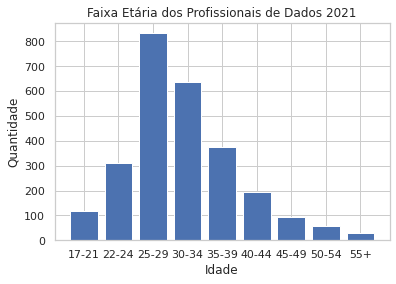

In [11]:
# plot - gráfico de barras
plt.bar(X, Y)
plt.ylabel('Quantidade')
plt.xlabel('Idade')
plt.title('Faixa Etária dos Profissionais de Dados 2021')
plt.show()

**Conclusão**. A maioria dos profissionais de dados estão entre os 25 e 34 anos.

## Quantas pessoas são mulheres x homens?

In [12]:
# histograma por gênero
val = dff['d.genero'].value_counts()
X = [key for key in val.keys()]
Y = [val[key] for key in val.keys()]

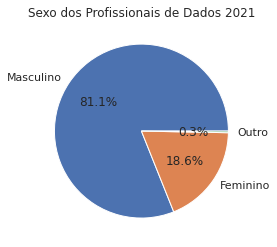

In [13]:
# plot - gráfico de pizza
plt.pie(Y, labels=X, autopct='%1.1f%%')
plt.title('Sexo dos Profissionais de Dados 2021')
plt.show()

**Conclusão**. Ainda vemos um claro desequilíbrio entre profissionais do sexo masculino versus feminino. Além disso, apenas uma pequena porcentagem de pessoas que se identificam como outro gênero.

## Em que estado moram?

In [14]:
# histograma por estado
top = 10
val = dff['d.estado'].value_counts()[0:top]
X = [key for key in val.keys()]
Y = [val[key] for key in val.keys()]

In [15]:
val.to_frame()

,d.estado
São Paulo (SP),1076
Minas Gerais (MG),341
Rio de Janeiro (RJ),222
Paraná (PR),149
Rio Grande do Sul (RS),136
Santa Catarina (SC),115
Distrito Federal (DF),96
Ceará (CE),68
Pernambuco (PE),58
Bahia (BA),58


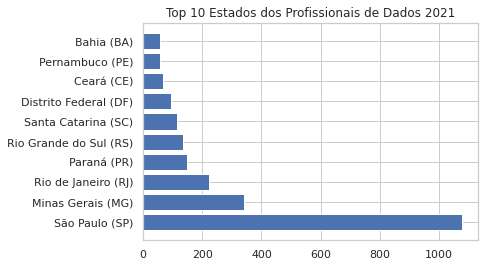

In [16]:
xT = range(len(Y))

# plot - gráfico de barras horizontal
plt.barh(xT, Y)
plt.yticks(xT, X)
plt.title(f'Top {top} Estados dos Profissionais de Dados 2021')
plt.show()

**Conclusão**. Forte presença de profissionais no estado de São Paulo (SP).

## Quais são as suas escolaridades?

ou seja, nível de ensino / formação.

In [17]:
# histograma por grau de escolaridade
val = dff['d.nivel_ensino'].value_counts()
X = [key for key in val.keys()]
Y = [val[key] for key in val.keys()]

In [18]:
val.to_frame()

,d.nivel_ensino
Graduação/Bacharelado,909
Pós-graduação,823
Estudante de Graduação,389
Mestrado,344
Doutorado ou Phd,116
Não tenho graduação formal,61
Prefiro não informar,3


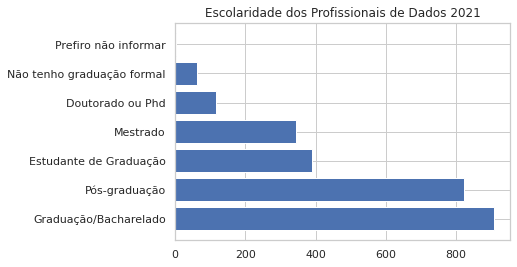

In [19]:
xT = range(len(Y))

# plot - gráfico de barras horizontal
plt.barh(xT, Y)
plt.yticks(xT, X)
plt.title(f'Escolaridade dos Profissionais de Dados 2021')
plt.show()

**Conclusão**. A maioria tem a formação graduação ou pós-graduação. Isso apenas reforça que não é necessário a formação academica de Mestrado e Doutorado para se trabalhar com dados. Por outro lado, formações complementares, tais como cursos e bootcamps são um diferencial para iniciar na área.

## Quais são as suas áreas de formação?

In [20]:
# histograma por área de formação
val = dff['d.area_formacao'].value_counts()
X = [key for key in val.keys()]
Y = [val[key] for key in val.keys()]

In [21]:
val.to_frame()

,d.area_formacao
Computação / Engenharia de Software / Sistemas de Informação/ TI,1096
Outras Engenharias,606
Economia/ Administração / Contabilidade / Finanças,378
Estatística/ Matemática / Matemática Computacional,214
Marketing / Publicidade / Comunicação / Jornalismo,75
Química / Física,73
Outras,52
Ciências Biológicas/Farmácia/Medicina/Área da Saúde,47
Ciências Sociais,40


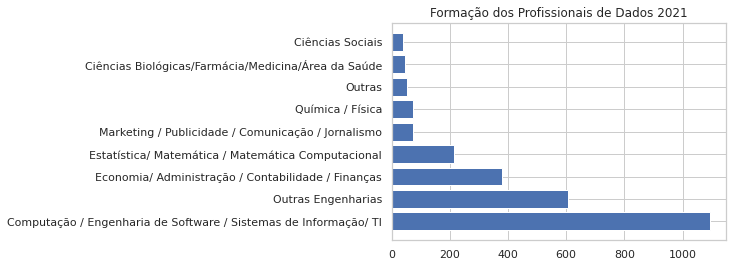

In [22]:
xT = range(len(Y))

# plot - gráfico de barras horizontal
plt.barh(xT, Y)
plt.yticks(xT, X)
plt.title('Formação dos Profissionais de Dados 2021')
plt.show()

**Conclusão**. Forte presença de profissionais formados em computação e outras engenherias. De qualquer forma, também vemos profissionais das mais diversas áreas.

## Qual é o área de formação por nível de escolaridade?

Neste caso, será um gráfico combinando valores de ambas colunas.   
Este gráfico é só uma demonstração de como podemos personalizar nossas visualizações.

> Criaremos um gráfico em que:   
> - _Eixo Y_ - Formação   
> - _Eixo X_ - Nível de Ensino   
> - Tamanho da bolinha é a quantidade de pessoas

In [23]:
# agrupando os valores
val = dff.groupby('d.area_formacao')['d.nivel_ensino'].value_counts().unstack().fillna(0)

In [24]:
val

d.nivel_ensino,Doutorado ou Phd,Estudante de Graduação,Graduação/Bacharelado,Mestrado,Pós-graduação
d.area_formacao,,,,,
Ciências Biológicas/Farmácia/Medicina/Área da Saúde,13,1,12,12,9
Ciências Sociais,2,3,9,8,18
Computação / Engenharia de Software / Sistemas de Informação/ TI,36,188,358,116,398
Economia/ Administração / Contabilidade / Finanças,4,42,145,32,155
Estatística/ Matemática / Matemática Computacional,12,62,52,37,51
Marketing / Publicidade / Comunicação / Jornalismo,3,3,30,10,29
Outras,2,6,25,7,12
Outras Engenharias,23,79,259,100,145
Química / Física,21,5,19,22,6


In [25]:
# recupera os valores, linha e coluna
degreee_level = val.index.tolist()
anonymized_degree_area = val.columns.tolist()

X = []
Y = []
area = []

# contagem por x e y
for i in range(len(degreee_level)):
    b = degreee_level[i]
    for j in range(len(anonymized_degree_area)):
        d = anonymized_degree_area[j]
        X.append(i)
        Y.append(j)
        area.append(val.loc[b][d] * 8)

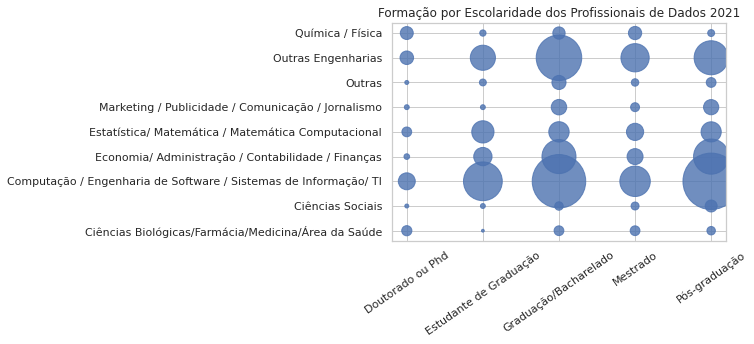

In [26]:
xT = range(len(degreee_level))
yT = range(len(anonymized_degree_area))

# plot - gráfico de bolinhas, com área
plt.scatter(Y, X, s=area, alpha=0.8)
plt.xticks(yT, anonymized_degree_area, rotation=35)
plt.yticks(xT, degreee_level)
plt.title(f'Formação por Escolaridade dos Profissionais de Dados 2021')
plt.show()

**Conclusão**. Nas formações de Computação e Outras Engenharias, notamos que a maioria fez Graduação e Pós-graduação - como mencionado anteriormente. Porém, quando analisamos as demais formações percebemos que bolinhas maiores, ou similares, são para os cursos de Mestrado e Doutorado. Sendo assim, podemos supor que profissionais formados em outras áreas (por exemplo, Química, Física, e Ciências Biológicas), possuem majoritariamente a formação em Mestrado e Doutorado. Veja os valores abaixo.

In [27]:
lines = ['Química / Física', 'Ciências Biológicas/Farmácia/Medicina/Área da Saúde']
val.loc[lines]

d.nivel_ensino,Doutorado ou Phd,Estudante de Graduação,Graduação/Bacharelado,Mestrado,Pós-graduação
d.area_formacao,,,,,
Química / Física,21,5,19,22,6
Ciências Biológicas/Farmácia/Medicina/Área da Saúde,13,1,12,12,9


<a href='#top'><span class="label label-info" style="font-size: 125%">Voltar para o Topo</span></a>

<a id='job'></a>

---

# Estudo de Empresas 

- Segmentos das Empresas
- Faixa Salárial dos profissionais

[Voltar para o Topo](#top)

## Quais são as verticais da empresas que mais trabalham com dados?

In [28]:
# histograma de setor
val = dff['e.setor'].value_counts()
val = val.to_frame().reset_index(drop=False)
val.columns = ['Setor', 'Quantidade']

In [29]:
top = 10
val.head(top)

,Setor,Quantidade
0,Tecnologia/Fábrica de Software,641
1,Finanças ou Bancos,388
2,Varejo,141
3,Indústria,133
4,Educação,129
5,Área da Saúde,128
6,Outro,122
7,Internet/Ecommerce,108
8,Setor Público,101
9,Marketing,80


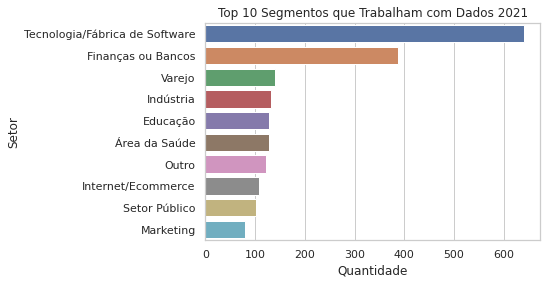

In [30]:
sns.barplot(data=val.head(top), x='Quantidade', y='Setor')
plt.title(f'Top {top} Segmentos que Trabalham com Dados 2021')
plt.show()

**Conclusão**. Os segmentos que mais trabalham com dados são empresas de tecnologia e finanças.

## Quais são os cargos mais comuns?

In [31]:
# histograma de setor
val = dff['e.cargo'].value_counts()
val = val.to_frame().reset_index(drop=False)
val.columns = ['Cargo', 'Quantidade']

In [32]:
val

,Cargo,Quantidade
0,Cientista de Dados/Data Scientist,357
1,Analista de BI/BI Analyst/Analytics Engineer,338
2,Analista de Dados/Data Analyst,324
3,Engenheiro de Dados/Data Engineer,300
4,Outro,113
5,Analista de Negócios/Business Analyst,96
6,Desenvolvedor ou Engenheiro de Software,92
7,Engenheiro de Machine Learning/ML Engineer,48
8,Outras Engenharias (não inclui dev),33
9,Estatístico,25


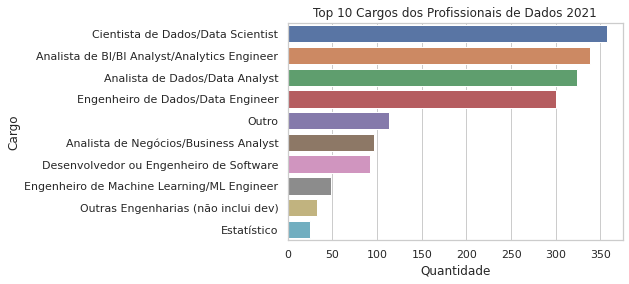

In [33]:
top = 10
sns.barplot(data=val.head(top), x='Quantidade', y='Cargo')
plt.title(f'Top {top} Cargos dos Profissionais de Dados 2021')
plt.show()

**Conclusão**. Vemos que os cargos mais comuns são (1) Cientista de Dados; (2) Analista de BI; (3) Analista de Dados; e (4) Engenheiro de Dados. 

Dado minha experiência, em algumas empresas, os Analistas de BI e Analistas de Dados são mesclados em um único cargo; Se considerarmos ambos o mesmo cargo - temos que os analista de Dados são os profissionais mais "comuns" da área de dados. O Analista de Dados é um dos primeiros profissionais de dados de uma companhia, é aquele que consegue entregar valor mais rapidamente e ter grande impacto em diversos setores da companhia.

## Qual é a faixa salárial dos profissionais?

In [34]:
# histograma de setor
val = dff['e.faixa_salarial'].value_counts()
val = val.to_frame().reset_index(drop=False)
val.columns = ['Valor', 'Quantidade']

In [35]:
# reordena os indices
reorderlist = [12, 7, 5, 4, 1, 2, 0, 3, 6, 8, 9, 10, 11]
val = val.reindex(reorderlist).reset_index(drop=True)

In [36]:
val

,Valor,Quantidade
0,Menos de R$ 1.000/mês,32
1,de R$ 1.001/mês a R$ 2.000/mês,126
2,de R$ 2.001/mês a R$ 3000/mês,180
3,de R$ 3.001/mês a R$ 4.000/mês,183
4,de R$ 4.001/mês a R$ 6.000/mês,403
5,de R$ 6.001/mês a R$ 8.000/mês,393
6,de R$ 8.001/mês a R$ 12.000/mês,479
7,de R$ 12.001/mês a R$ 16.000/mês,263
8,de R$ 16.001/mês a R$ 20.000/mês,129
9,de R$ 20.001/mês a R$ 25.000/mês,62


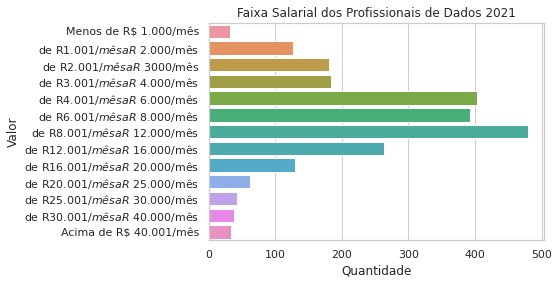

In [37]:
sns.barplot(data=val, x='Quantidade', y='Valor')
plt.title('Faixa Salarial dos Profissionais de Dados 2021')
plt.show()

**Conclusão**. Vemos que a maioria dos salários variam entre RS 4.000,00 e RS 12.000,00.

## Qual a faixa salarial por cargo?

- Neste caso, será um gráfico combinando valores.
- Apenas top cargos x faixa salarial.


In [38]:
# filtra pelo top cargos (mais pessoas)
top = 5
cargos = dff['e.cargo'].value_counts().head(top)
val = dff[dff['e.cargo'].isin(cargos.index)]

In [39]:
val = val.groupby("e.faixa_salarial")["e.cargo"].value_counts().unstack().fillna(0)

In [40]:
# reordena a lista
reorderlist = ['Menos de R$ 1.000/mês', 'de R$ 1.001/mês a R$ 2.000/mês', 'de R$ 2.001/mês a R$ 3000/mês',
               'de R$ 3.001/mês a R$ 4.000/mês', 'de R$ 4.001/mês a R$ 6.000/mês', 'de R$ 6.001/mês a R$ 8.000/mês',
               'de R$ 8.001/mês a R$ 12.000/mês', 'de R$ 12.001/mês a R$ 16.000/mês', 'de R$ 16.001/mês a R$ 20.000/mês',
               'de R$ 20.001/mês a R$ 25.000/mês', 'de R$ 25.001/mês a R$ 30.000/mês', 'de R$ 30.001/mês a R$ 40.000/mês',
               'Acima de R$ 40.001/mês']
val = val.reindex(reorderlist)

In [41]:
val

e.cargo,Analista de BI/BI Analyst/Analytics Engineer,Analista de Dados/Data Analyst,Cientista de Dados/Data Scientist,Engenheiro de Dados/Data Engineer,Outro
e.faixa_salarial,,,,,
Menos de R$ 1.000/mês,2.0,6.0,5.0,1.0,3.0
de R$ 1.001/mês a R$ 2.000/mês,24.0,18.0,22.0,8.0,11.0
de R$ 2.001/mês a R$ 3000/mês,51.0,27.0,14.0,14.0,20.0
de R$ 3.001/mês a R$ 4.000/mês,37.0,37.0,20.0,22.0,13.0
de R$ 4.001/mês a R$ 6.000/mês,89.0,77.0,50.0,50.0,21.0
de R$ 6.001/mês a R$ 8.000/mês,53.0,68.0,78.0,62.0,15.0
de R$ 8.001/mês a R$ 12.000/mês,53.0,67.0,95.0,60.0,16.0
de R$ 12.001/mês a R$ 16.000/mês,19.0,15.0,42.0,44.0,8.0
de R$ 16.001/mês a R$ 20.000/mês,5.0,1.0,15.0,17.0,1.0


Abaixo tem _(ocultado)_ um código para normalizar os valores por coluna.   
Assim, a visualização trará a representatividade (%) para cada Cargo.   

In [42]:
total = val.apply(lambda x: x.sum(), axis=0)

for idx, row in val.iterrows():
    for column, value in row.items():
        val.at[idx, column] = value/total.loc[column]

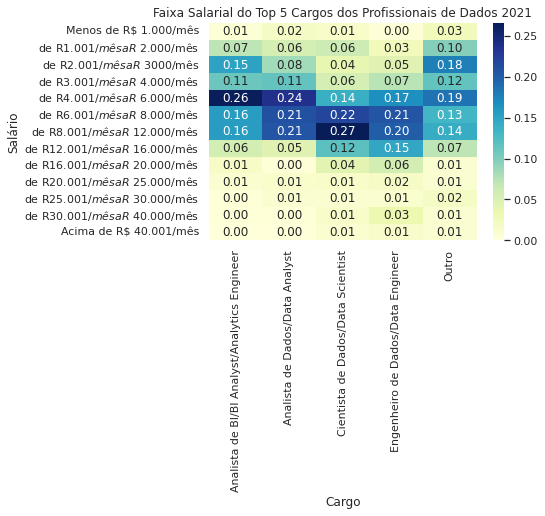

In [43]:
ax = sns.heatmap(val, annot=True, fmt=".2f", cmap="YlGnBu")
ax.set(xlabel='Cargo', ylabel='Salário')
plt.title(f'Faixa Salarial do Top {top} Cargos dos Profissionais de Dados 2021')
plt.show()

**Conclusão**. Em média, temos que os Cientistas de Dados ganham um maior salário. Enquanto, o Analista de Dados possui uma distribuição proporcional entre RS 4.000,00 e RS 12.000,00. De qualquer forma, destacamos que o Engenheiro de Dados possui 3% de seus funcionários com salários entre RS 30.000,00 e RS 40.000,00; ou seja, Engenheiro de Dados podem ganhar bem mais (ou tem mais chances) do que os demais cargos.

<a href='#top'><span class="label label-info" style="font-size: 125%">Voltar para o Topo</span></a>

<a id='tech'></a>

---

# Estudo de Tecnologia 

Quais são as tecnologias mais utilizadas pelo cientistas de dados?

- Linguagens de Programação
    - Qual é a predileta?
- Bases de dados de dados
- _Cloud,_ ou Computação em Nuvem
- Ferramentas de _Business Intelligence_

[Voltar para o Topo](#top)


## Quais são as linguagens mais utilizadas? 

In [44]:
columns = ["t.SQL", "t.R", "t.Python", "t.C/C++/C#", "t.NET", "t.Java", "t.Julia", "t.SAS/Stata", "t.Visual Basic/VBA", "t.Scala", 
           "t.Matlab", "t.PHP", "t.Javascript", "t.Nenhuma linguagem"]

val = dff[columns].sum().sort_values().to_dict()
X = [key for key in val.keys()]
Y = [int(val[key]) for key in val.keys()]

In [45]:
val = pd.DataFrame(data={'Linguagem':X, 'Qtde':Y})
val

,Linguagem,Qtde
0,t.Julia,8
1,t.Matlab,15
2,t.PHP,38
3,t.NET,42
4,t.C/C++/C#,64
5,t.SAS/Stata,77
6,t.Scala,89
7,t.Visual Basic/VBA,160
8,t.Nenhuma linguagem,162
9,t.Javascript,174


In [46]:
# gráfico de barras
fig = px.bar(val, x='Linguagem', y='Qtde', text=Y)
fig.show()

**Conclusão**. A maioria utiliza SQL e Python em seu trabalho.

### Sobre Python, quantos usam e quantos não usam?

In [47]:
dff["t.Python"].value_counts()

1.0    1346
0.0     511
Name: t.Python, dtype: int64

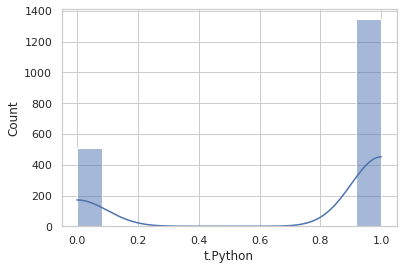

In [48]:
# seaborn
sns.histplot(data=dff, x="t.Python", kde=True)
plt.show()

**Conclusão**. A maioria utiliza Python, pelo menos 72%.

## Quais as bases de dados mais utilizadas?

In [49]:
columns = ["t.MySQL", "t.Oracle", "t.SQL SERVER", "t.SAP", "t.Amazon Aurora ou RDS", 
           "t.Amazon DynamoDB", "t.CoachDB", "t.Cassandra", "t.MongoDB", "t.MariaDB", 
           "t.Datomic", "t.S3", "t.PostgreSQL", "t.ElasticSearch", "t.DB2", 
           "t.Microsoft Access", "t.SQLite", "t.Sybase", "t.Firebase", "t.Vertica", 
           "t.Redis", "t.Neo4J", "t.Google BigQuery", "t.Google Firestore", "t.Amazon Redshift", 
           "t.Amazon Athena", "t.Snowflake", "t.Databricks", "t.HBase", "t.Presto", 
           "t.Splunk", "t.SAP HANA", "t.Hive", "t.Firebird"]

val = dff[columns].sum().sort_values().to_dict()
X = [key for key in val.keys()]
Y = [int(val[key]) for key in val.keys()]

In [50]:
top = 15
val = pd.DataFrame(data={'Dados':X, 'Qtde':Y})
val.tail(top)

,Dados,Qtde
19,t.SQLite,91
20,t.Amazon DynamoDB,101
21,t.ElasticSearch,108
22,t.Amazon Aurora ou RDS,130
23,t.Hive,163
24,t.Amazon Athena,208
25,t.MongoDB,216
26,t.Amazon Redshift,225
27,t.Databricks,232
28,t.Google BigQuery,340


In [51]:
# gráfico de barras
fig = px.bar(val.tail(top), x='Dados', y='Qtde', text=Y[:top])
fig.show()

**Conclusão**. Vemos que as Bases de Dados mais utilizadas são, em sua maioria, relacionais, com destaque para MySQL, PostgreSQL e SQL Server.

## Qual é a plataforma de _Business Intelligence_ mais utilizada?

In [52]:
columns = ["t.Microsoft Power BI", "t.Qlik Sense", "t.Tableau", "t.Metabase", 
           "t.Superset", "t.Redash", "t.MicroStrategy", "t.IBM Analytics/Cognos", "t.SAP Business Objects", 
           "t.Oracle Business Intelligence", "t.Amazon QuickSight", "t.Salesforce Einstein", "t.Mode", 
           "t.Alteryx", "t.Birst", "t.Looker", "t.Google Data Studio", "t.SAS Visual Analytics", 
           "t.Grafana", "t.TIBCO Spotfire", "t.Pentaho"]

val = dff[columns].sum().sort_values().to_dict()
X = [key for key in val.keys()]
Y = [int(val[key]) for key in val.keys()]

In [53]:
top = 15
val = pd.DataFrame(data={'BI':X, 'Qtde':Y})
val.tail(top)

,BI,Qtde
6,t.SAS Visual Analytics,25
7,t.MicroStrategy,37
8,t.SAP Business Objects,41
9,t.Salesforce Einstein,42
10,t.Amazon QuickSight,43
11,t.Redash,47
12,t.Alteryx,52
13,t.Pentaho,97
14,t.Looker,117
15,t.Qlik Sense,118


In [54]:
# gráfico de barras
fig = px.bar(val.tail(top), x='BI', y='Qtde', text=Y[:top], color='BI')
fig.show()

**Conclusão**. Nas tecnologias de BI, destacamos o Microsoft Power BI, Tableau e Google data Studio.

## Qual é a plataforma de _Cloud_ mais utilizada?

In [55]:
columns = ["t.Amazon Web Services (AWS)", "t.Google Cloud (GCP)", "t.Azure (Microsoft)", "t.Oracle Cloud", 
           "t.IBM", "t.On Premise", "t.Cloud Propria"]

val = dff[columns].sum().sort_values().to_dict()
X = [key for key in val.keys()]
Y = [int(val[key]) for key in val.keys()]

In [56]:
val = pd.DataFrame(data={'Cloud':X, 'Qtde':Y})
val.tail(top)

,Cloud,Qtde
0,t.IBM,35
1,t.Oracle Cloud,65
2,t.Cloud Propria,149
3,t.On Premise,433
4,t.Google Cloud (GCP),448
5,t.Azure (Microsoft),498
6,t.Amazon Web Services (AWS),786


In [57]:
# gráfico de barras
fig = px.bar(val.tail(top), x='Cloud', y='Qtde', text=Y[:top], color='Cloud')
fig.show()

**Conclusão**. AWS se destaca entre as plataformas de nuvem, com o dobro se comparada com o segundo colocado.

<a href='#top'><span class="label label-info" style="font-size: 125%">Voltar para o Topo</span></a>